In [0]:
mount_point = "/mnt/penicilindata"
storage_account_name = "penicilindatalake"
container_name = "penicilin-data"
storage_account_key = "Tq6lVpzkcitS9uBxwvZITJl7KMu6o3Ok1VkVRmp38ZMUZXM5AJzhOvMFpBogrnbLfqOSqkOuYGJB+AStwszFBw=="

# Check if it's already mounted
if not any(mount.mountPoint == mount_point for mount in dbutils.fs.mounts()):
    dbutils.fs.mount(
        source = f"wasbs://{container_name}@{storage_account_name}.blob.core.windows.net/",
        mount_point = mount_point,
        extra_configs = {
            f"fs.azure.account.key.{storage_account_name}.blob.core.windows.net": storage_account_key
        }
    )
else:
    print(f"Already mounted: {mount_point}")

Already mounted: /mnt/penicilindata


In [0]:
# Paths to the CSV files
file1_path = "/mnt/penicilindata/100_Batches_IndPenSim_V3.csv"

# ✅ Read the CSV files using pipe delimiter
df_batches = spark.read.csv(file1_path, header=True, inferSchema=True)
df_batches = df_batches.toDF(*[col.strip() for col in df_batches.columns])

# Display the headers (first few rows) of each DataFrame
df_batches.show(5)

+--------+---------------------+---------------------+-----------------------+----------------------+----------------------+---------------------------------------+-------------------------------+------------------------------------+-------------------------------+-------------------------------+------------------------------+----------------------------------------+-------------------------------+------------------+--------------------+---------+----------------+--------------------+----------------------------------------------+-----------------------------+-----------------------------------------------------+-------------------+-------------------------------------------------------+------------------------------------+----------------------------------------+-------------------------------------------------------+---------------------------------------------------+------------------------------+----------------------------+--------------------------------------+-------------------

In [0]:
print("Column count:", len(df_batches.columns))
for i, c in enumerate(df_batches.columns):
    print(f"{i}: [{c}]")


Column count: 2239
0: [Time (h)]
1: [Aeration rate(Fg:L/h)]
2: [Agitator RPM(RPM:RPM)]
3: [Sugar feed rate(Fs:L/h)]
4: [Acid flow rate(Fa:L/h)]
5: [Base flow rate(Fb:L/h)]
6: [Heating/cooling water flow rate(Fc:L/h)]
7: [Heating water flow rate(Fh:L/h)]
8: [Water for injection/dilution(Fw:L/h)]
9: [Air head pressure(pressure:bar)]
10: [Dumped broth flow(Fremoved:L/h)]
11: [Substrate concentration(S:g/L)]
12: [Dissolved oxygen concentration(DO2:mg/L)]
13: [Penicillin concentration(P:g/L)]
14: [Vessel Volume(V:L)]
15: [Vessel Weight(Wt:Kg)]
16: [pH(pH:pH)]
17: [Temperature(T:K)]
18: [Generated heat(Q:kJ)]
19: [carbon dioxide percent in off-gas(CO2outgas:%)]
20: [PAA flow(Fpaa:PAA flow (L/h))]
21: [PAA concentration offline(PAA_offline:PAA (g L^{-1}))]
22: [Oil flow(Foil:L/hr)]
23: [NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))]
24: [Oxygen Uptake Rate(OUR:(g min^{-1}))]
25: [Oxygen in percent in off-gas(O2:O2  (%))]
26: [Offline Penicillin concentration(P_offline:P(g L^{-1}))]


In [0]:
# Split the data into process and Raman (PAT) data
process_columns = df_batches.columns[:df_batches.columns.index('Fault flag') + 1]  # Process data up to 'Fault flag'
raman_columns = df_batches.columns[df_batches.columns.index('Fault flag') + 1:]  # Raman data (PAT)

In [0]:
# Extract process data and Raman data
df_process_data = df_batches.select(process_columns)

In [0]:
# Show the first few rows of the process data and Raman data
print("\nFirst 10 rows of the process data:")
df_process_data.show(10)


First 10 rows of the process data:
+--------+---------------------+---------------------+-----------------------+----------------------+----------------------+---------------------------------------+-------------------------------+------------------------------------+-------------------------------+-------------------------------+------------------------------+----------------------------------------+-------------------------------+------------------+--------------------+---------+----------------+--------------------+----------------------------------------------+-----------------------------+-----------------------------------------------------+-------------------+-------------------------------------------------------+------------------------------------+----------------------------------------+-------------------------------------------------------+---------------------------------------------------+------------------------------+----------------------------+----------------------

In [0]:
row_count = df_process_data.count()
print(f"Total number of rows: {row_count}")


Total number of rows: 113935


In [0]:
from pyspark.sql.functions import col

# Prepare the Spark DataFrame for visualization
df_plot_data = df_process_data.select(
    col("2-PAT control(PAT_ref:PAT ref)"),
    col("Time (h)").cast("double"),
    col("Penicillin concentration(P:g/L)").alias("Penicillin_Conc").cast("double")
)

# Optional: filter out rows with nulls (cleaner plots)
df_plot_data = df_plot_data.dropna()

# Use Databricks' built-in interactive display
display(df_plot_data)


2-PAT control(PAT_ref:PAT ref),Time (h),Penicillin_Conc
1,0.2,1.0178E-25
1,0.4,0.001
1,0.6,9.9934E-4
1,0.8,9.9874E-4
1,1.0,9.9821E-4
1,1.2,9.9771E-4
1,1.4,9.9722E-4
1,1.6,9.9674E-4
1,1.8,9.9627E-4
1,2.0,9.958E-4


Databricks visualization. Run in Databricks to view.

In [0]:
from pyspark.sql.functions import col, mean, stddev, max, min
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.sql.types import DoubleType, FloatType, IntegerType


In [0]:
# Define your working DataFrame first (assuming df_model already exists)
df_model = df_process_data.dropna(how='any')

# Get all numeric columns except target and identifiers
feature_cols = [
    field.name for field in df_model.schema.fields
    if isinstance(field.dataType, (DoubleType, FloatType, IntegerType))
    and field.name not in ["Penicillin concentration(P:g/L)", "2-PAT control(PAT_ref:PAT ref)"]
]

print("Numeric feature columns:", feature_cols)

Numeric feature columns: ['Time (h)', 'Aeration rate(Fg:L/h)', 'Agitator RPM(RPM:RPM)', 'Sugar feed rate(Fs:L/h)', 'Acid flow rate(Fa:L/h)', 'Base flow rate(Fb:L/h)', 'Heating/cooling water flow rate(Fc:L/h)', 'Heating water flow rate(Fh:L/h)', 'Water for injection/dilution(Fw:L/h)', 'Air head pressure(pressure:bar)', 'Dumped broth flow(Fremoved:L/h)', 'Substrate concentration(S:g/L)', 'Dissolved oxygen concentration(DO2:mg/L)', 'Vessel Volume(V:L)', 'Vessel Weight(Wt:Kg)', 'pH(pH:pH)', 'Temperature(T:K)', 'Generated heat(Q:kJ)', 'carbon dioxide percent in off-gas(CO2outgas:%)', 'PAA flow(Fpaa:PAA flow (L/h))', 'PAA concentration offline(PAA_offline:PAA (g L^{-1}))', 'Oil flow(Foil:L/hr)', 'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))', 'Oxygen Uptake Rate(OUR:(g min^{-1}))', 'Oxygen in percent in off-gas(O2:O2  (%))', 'Offline Penicillin concentration(P_offline:P(g L^{-1}))', 'Offline Biomass concentratio(X_offline:X(g L^{-1}))', 'Carbon evolution rate(CER:g/h)', 'Ammonia s

In [0]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=feature_cols,
    outputCol="features"
)

In [0]:
from pyspark.ml.regression import RandomForestRegressor

rf = RandomForestRegressor(
    labelCol="Penicillin concentration(P:g/L)",
    featuresCol="features",
    numTrees=100
)


In [0]:
from pyspark.ml.regression import GBTRegressor

gbt = GBTRegressor(
    labelCol="Penicillin concentration(P:g/L)",
    featuresCol="features",
    maxIter=100
)

In [0]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(
    labelCol="Penicillin concentration(P:g/L)",
    featuresCol="features"
)

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(
    labelCol="Penicillin concentration(P:g/L)",
    predictionCol="prediction",
    metricName="rmse"
)

def evaluate_model(model, model_name, train, test):
    pipeline = Pipeline(stages=[assembler, model])
    fitted_model = pipeline.fit(train)
    predictions = fitted_model.transform(test)

    rmse = evaluator.evaluate(predictions)
    print(f"{model_name} RMSE: {rmse:.3f}")
    return rmse

In [0]:
# Split the data into training and test sets
train, test = df_model.randomSplit([0.8, 0.2], seed=42)

In [0]:
evaluate_model(
    RandomForestRegressor(labelCol="Penicillin concentration(P:g/L)", featuresCol="features"),
    "Random Forest",
    train,
    test
)

evaluate_model(
    GBTRegressor(labelCol="Penicillin concentration(P:g/L)", featuresCol="features", maxIter=100),
    "Gradient Boosted Trees",
    train,
    test
)

evaluate_model(
    LinearRegression(labelCol="Penicillin concentration(P:g/L)", featuresCol="features"),
    "Linear Regression",
    train,
    test
)

🏃 View run nosy-squirrel-46 at: https://adb-1765745476123858.18.azuredatabricks.net/ml/experiments/3073736699666189/runs/06ad10c14f574383a3fe5fd374762ab4
🧪 View experiment at: https://adb-1765745476123858.18.azuredatabricks.net/ml/experiments/3073736699666189
Random Forest RMSE: 0.405
🏃 View run languid-pig-783 at: https://adb-1765745476123858.18.azuredatabricks.net/ml/experiments/3073736699666189/runs/408a1cf692d74c49a5c980d2ad8de11b
🧪 View experiment at: https://adb-1765745476123858.18.azuredatabricks.net/ml/experiments/3073736699666189
Gradient Boosted Trees RMSE: 0.339
🏃 View run youthful-squid-689 at: https://adb-1765745476123858.18.azuredatabricks.net/ml/experiments/3073736699666189/runs/a5e441f1a83048189798a0fa98d9fa4c
🧪 View experiment at: https://adb-1765745476123858.18.azuredatabricks.net/ml/experiments/3073736699666189
Linear Regression RMSE: 0.044


0.04449083732512164

In [0]:
import pandas as pd
from pyspark.sql import SparkSession

# Create a pandas DataFrame with the results
model_results = pd.DataFrame({
    "Model": ["Random Forest", "Gradient Boosted Trees", "Linear Regression"],
    "Type": ["Ensemble (Bagging)", "Ensemble (Boosting)", "Linear"],
    "RMSE": [0.405, 0.339, 0.044]
})

# Convert to Spark DataFrame for dashboard display
spark = SparkSession.builder.getOrCreate()
df_model_summary = spark.createDataFrame(model_results)

# Display table
display(df_model_summary)

Model,Type,RMSE
Random Forest,Ensemble (Bagging),0.405
Gradient Boosted Trees,Ensemble (Boosting),0.339
Linear Regression,Linear,0.044


In [0]:
from pyspark.ml import PipelineModel

# Refit the final model on the full dataset if needed
final_pipeline = Pipeline(stages=[assembler, lr])
final_model = final_pipeline.fit(df_model)

# Save the trained pipeline model
final_model.write().overwrite().save("/dbfs/models/yield_prediction_lr_model")

🏃 View run fun-colt-625 at: https://adb-1765745476123858.18.azuredatabricks.net/ml/experiments/3073736699666189/runs/3176f4a1ab984e47a69a6848d64c0dbf
🧪 View experiment at: https://adb-1765745476123858.18.azuredatabricks.net/ml/experiments/3073736699666189


In [0]:
# Filter df_process_data where '2-PAT control(PAT_ref:PAT ref)' equals 13
batch_13_df = df_process_data.filter(df_process_data["2-PAT control(PAT_ref:PAT ref)"] == 13)

# Preview
batch_13_df.select("Time (h)", "Penicillin concentration(P:g/L)", "2-PAT control(PAT_ref:PAT ref)").show(10, truncate=False)

+--------+-------------------------------+------------------------------+
|Time (h)|Penicillin concentration(P:g/L)|2-PAT control(PAT_ref:PAT ref)|
+--------+-------------------------------+------------------------------+
|0.2     |0.001                          |13                            |
|0.4     |9.9938E-4                      |13                            |
|0.6     |9.9874E-4                      |13                            |
|0.8     |9.9815E-4                      |13                            |
|1.0     |9.9762E-4                      |13                            |
|1.2     |9.9712E-4                      |13                            |
|1.4     |9.9664E-4                      |13                            |
|1.6     |9.9617E-4                      |13                            |
|1.8     |9.957E-4                       |13                            |
|2.0     |9.9523E-4                      |13                            |
+--------+----------------------------

In [0]:
feature_columns = [
    'Time (h)', 'Aeration rate(Fg:L/h)', 'Agitator RPM(RPM:RPM)', 'Sugar feed rate(Fs:L/h)', 
    'Acid flow rate(Fa:L/h)', 'Base flow rate(Fb:L/h)', 'Heating/cooling water flow rate(Fc:L/h)', 
    'Heating water flow rate(Fh:L/h)', 'Water for injection/dilution(Fw:L/h)', 
    'Air head pressure(pressure:bar)', 'Dumped broth flow(Fremoved:L/h)', 
    'Substrate concentration(S:g/L)', 'Dissolved oxygen concentration(DO2:mg/L)', 
    'Vessel Volume(V:L)', 'Vessel Weight(Wt:Kg)', 'pH(pH:pH)', 'Temperature(T:K)', 
    'Generated heat(Q:kJ)', 'carbon dioxide percent in off-gas(CO2outgas:%)', 
    'PAA flow(Fpaa:PAA flow (L/h))', 'PAA concentration offline(PAA_offline:PAA (g L^{-1}))', 
    'Oil flow(Foil:L/hr)', 'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))', 
    'Oxygen Uptake Rate(OUR:(g min^{-1}))', 'Oxygen in percent in off-gas(O2:O2  (%))', 
    'Offline Penicillin concentration(P_offline:P(g L^{-1}))', 
    'Offline Biomass concentratio(X_offline:X(g L^{-1}))', 'Carbon evolution rate(CER:g/h)', 
    'Ammonia shots(NH3_shots:kgs)', 'Viscosity(Viscosity_offline:centPoise)', 
    'Fault reference(Fault_ref:Fault ref)', 
    '0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref)', 
    '1- No Raman spec', '1-Raman spec recorded', 'Batch reference(Batch_ref:Batch ref)', 
    'Batch ID', 'Fault flag'
]


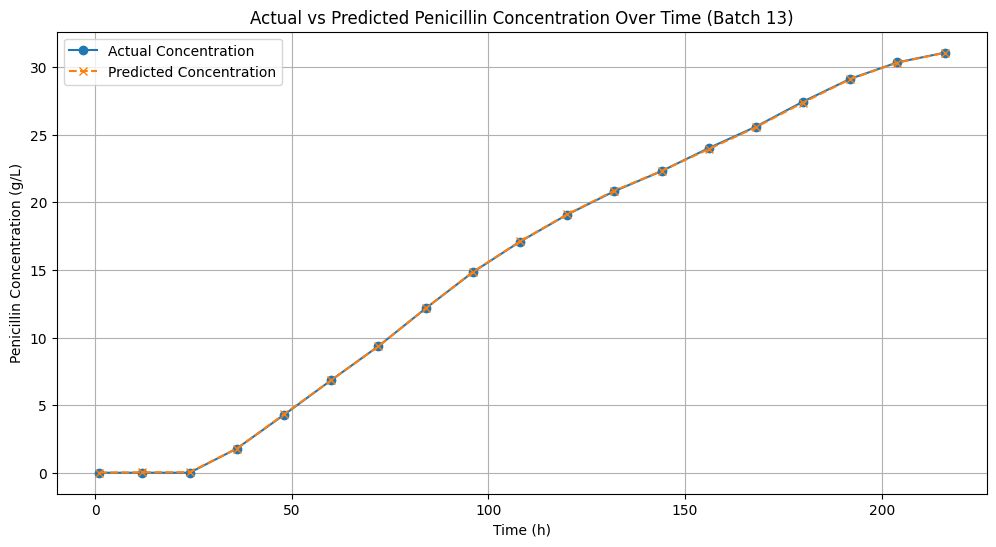

Time (h),Penicillin concentration(P:g/L),prediction
1.0,9.9762E-4,0.011473899127111498
12.0,9.6594E-4,0.030086415805787414
24.0,9.0122E-4,0.040437726278256036
36.0,1.7889,1.7822385530134595
48.0,4.2827,4.327768366288863
60.0,6.8448,6.845948750569519
72.0,9.3604,9.34375668664439
84.0,12.149,12.155561773092026
96.0,14.828,14.8490591927163
108.0,17.09,17.110746160665272


In [0]:
from pyspark.ml.pipeline import PipelineModel
import matplotlib.pyplot as plt
import pandas as pd

# Load saved pipeline model (includes VectorAssembler + LinearRegression)
loaded_model = PipelineModel.load("/dbfs/models/yield_prediction_lr_model")

# Select batch 13
batch_13_df = df_process_data.filter(df_process_data["2-PAT control(PAT_ref:PAT ref)"] == 13)

# Drop rows with nulls in feature columns (to avoid prediction errors)
batch_13_df_clean = batch_13_df.dropna(subset=feature_columns)

# Predict using the trained pipeline model
predictions_batch_13 = loaded_model.transform(batch_13_df_clean)

# Convert to Pandas for plotting
predictions_batch_13_pd = predictions_batch_13.select(
    "Time (h)", "Penicillin concentration(P:g/L)", "prediction"
).toPandas()

# Sort by time
predictions_batch_13_pd = predictions_batch_13_pd.sort_values("Time (h)")

# Plot Actual vs Predicted
plt.figure(figsize=(12,6))
plt.plot(predictions_batch_13_pd["Time (h)"], predictions_batch_13_pd["Penicillin concentration(P:g/L)"],
         label="Actual Concentration", marker="o")
plt.plot(predictions_batch_13_pd["Time (h)"], predictions_batch_13_pd["prediction"],
         label="Predicted Concentration", linestyle="--", marker="x")

plt.title("Actual vs Predicted Penicillin Concentration Over Time (Batch 13)")
plt.xlabel("Time (h)")
plt.ylabel("Penicillin Concentration (g/L)")
plt.legend()
plt.grid(True)
plt.show()

display(predictions_batch_13_pd.head(50))

In [0]:
from pyspark.sql import Row

# Create dummy values for batch 101 (you can adjust them as needed)
new_data = [Row(
    **{
        'Time (h)': 100,
        'Aeration rate(Fg:L/h)': 30.0,
        'Agitator RPM(RPM:RPM)': 100.0,
        'Sugar feed rate(Fs:L/h)': 8.0,
        'Acid flow rate(Fa:L/h)': 0.0,
        'Base flow rate(Fb:L/h)': 25.0,
        'Heating/cooling water flow rate(Fc:L/h)': 10.0,
        'Heating water flow rate(Fh:L/h)': 0.1,
        'Water for injection/dilution(Fw:L/h)': 0.0,
        'Air head pressure(pressure:bar)': 0.6,
        'Dumped broth flow(Fremoved:L/h)': 0.0,
        'Substrate concentration(S:g/L)': 1.0,
        'Dissolved oxygen concentration(DO2:mg/L)': 14.0,
        'Vessel Volume(V:L)': 58500.0,
        'Vessel Weight(Wt:Kg)': 62600.0,
        'pH(pH:pH)': 6.5,
        'Temperature(T:K)': 298.1,
        'Generated heat(Q:kJ)': 1e-6,
        'carbon dioxide percent in off-gas(CO2outgas:%)': 0.11,
        'PAA flow(Fpaa:PAA flow (L/h))': 5.0,
        'PAA concentration offline(PAA_offline:PAA (g L^{-1}))': 1400.0,
        'Oil flow(Foil:L/hr)': 22.0,
        'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))': 1600.0,
        'Oxygen Uptake Rate(OUR:(g min^{-1}))': 0.5,
        'Oxygen in percent in off-gas(O2:O2  (%))': 0.2,
        'Offline Penicillin concentration(P_offline:P(g L^{-1}))': 0.0,
        'Offline Biomass concentratio(X_offline:X(g L^{-1}))': 0.0,
        'Carbon evolution rate(CER:g/h)': 0.05,
        'Ammonia shots(NH3_shots:kgs)': 0.0,
        'Viscosity(Viscosity_offline:centPoise)': 4.0,
        'Fault reference(Fault_ref:Fault ref)': 0.0,
        '0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref)': 1.0,
        '1- No Raman spec': 1.0,
        '1-Raman spec recorded': 1.0,
        'Batch reference(Batch_ref:Batch ref)': 0.0,
        'Batch ID': 101.0,
        'Fault flag': 0.0
    }
)]

# Convert to DataFrame
new_batch_df = spark.createDataFrame(new_data)



In [0]:
import random
from pyspark.sql.types import DoubleType
from pyspark.sql import Row

# Number of synthetic rows to generate
n_rows = 20

# Extract schema from the original DataFrame
schema = df_process_data.schema

# Helper function to generate random but reasonable values
def random_value(field_name):
    if field_name == "Time (h)":
        return round(random.uniform(0.0, 300.0), 1)
    elif "pH" in field_name:
        return round(random.uniform(5.5, 7.5), 3)
    elif "Temperature" in field_name:
        return round(random.uniform(290, 310), 2)
    elif "Flow" in field_name or "flow rate" in field_name:
        return round(random.uniform(0.0, 60.0), 2)
    elif "concentration" in field_name:
        return round(random.uniform(0.0, 20.0), 3)
    elif "RPM" in field_name:
        return round(random.uniform(50, 300), 0)
    elif "Weight" in field_name:
        return round(random.uniform(60000, 64000), 1)
    elif "Volume" in field_name:
        return round(random.uniform(58000, 59000), 0)
    elif "Batch ID" in field_name:
        return 101.0
    elif "Fault flag" in field_name:
        return 0.0
    elif "reference" in field_name or "spec" in field_name:
        return float(random.choice([0, 1]))
    else:
        return round(random.uniform(0.0, 10.0), 3)

# Generate random rows
rows = []
for _ in range(n_rows):
    row_data = {
        field.name: random_value(field.name) if isinstance(field.dataType, DoubleType) else 0.0
        for field in schema.fields
    }
    rows.append(Row(**row_data))

# Create the DataFrame
new_batch_df = spark.createDataFrame(rows)

# Preview
new_batch_df.show(truncate=False)

+--------+---------------------+---------------------+-----------------------+----------------------+----------------------+---------------------------------------+-------------------------------+------------------------------------+-------------------------------+-------------------------------+------------------------------+----------------------------------------+-------------------------------+------------------+--------------------+---------+----------------+--------------------+----------------------------------------------+-----------------------------+-----------------------------------------------------+-------------------+-------------------------------------------------------+------------------------------------+----------------------------------------+-------------------------------------------------------+---------------------------------------------------+------------------------------+----------------------------+--------------------------------------+-------------------

In [0]:
# Load the saved model
loaded_model = PipelineModel.load("/dbfs/models/yield_prediction_lr_model")

# Run prediction
predictions = loaded_model.transform(new_batch_df)

# View output
predictions.select("Batch ID", "prediction").show()

+--------+------------------+
|Batch ID|        prediction|
+--------+------------------+
|   101.0|-1.533280033961135|
|   101.0|  37.2849411129603|
|   101.0| 18.97173168181433|
|   101.0|25.374725569418523|
|   101.0|26.309091616995385|
|   101.0| 33.72544650088895|
|   101.0|34.972211482689644|
|   101.0|15.634557755812718|
|   101.0|10.035904298045848|
|   101.0|31.836204510104995|
|   101.0| 35.99571400215217|
|   101.0|32.856844460240964|
|   101.0|12.253958396708981|
|   101.0|  39.6726037581594|
|   101.0|29.502171253882228|
|   101.0| 21.58957533519225|
|   101.0|27.236017382522586|
|   101.0|26.559198846465833|
|   101.0|11.959830540830488|
|   101.0|22.563901664889908|
+--------+------------------+



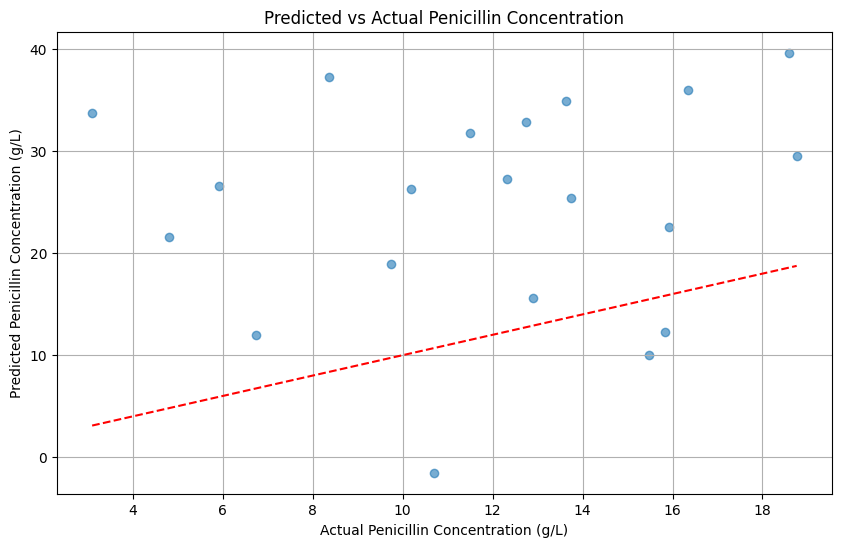

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to Pandas for easier plotting
predictions_pd = predictions.select(
    "prediction", "Penicillin concentration(P:g/L)"
).toPandas()

# Create the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(predictions_pd["Penicillin concentration(P:g/L)"], predictions_pd["prediction"], alpha=0.6)
plt.plot([predictions_pd["Penicillin concentration(P:g/L)"].min(), predictions_pd["Penicillin concentration(P:g/L)"].max()],
         [predictions_pd["Penicillin concentration(P:g/L)"].min(), predictions_pd["Penicillin concentration(P:g/L)"].max()],
         color='red', linestyle='--')  # Reference line y=x

plt.title("Predicted vs Actual Penicillin Concentration")
plt.xlabel("Actual Penicillin Concentration (g/L)")
plt.ylabel("Predicted Penicillin Concentration (g/L)")
plt.grid(True)
plt.show()